# How to build a simple neural network in 4 steps
**This Notebooks shows how to build a simple neural network using Keras. In particular I will focus on mnist handwritten digits dataset. The goal is to create a neural network that can effectively guess handwritten digits.**

In [24]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from keras.datasets import mnist

# **Step 1**: Load a simple dataset containing handwritten characters, with associated identifying label

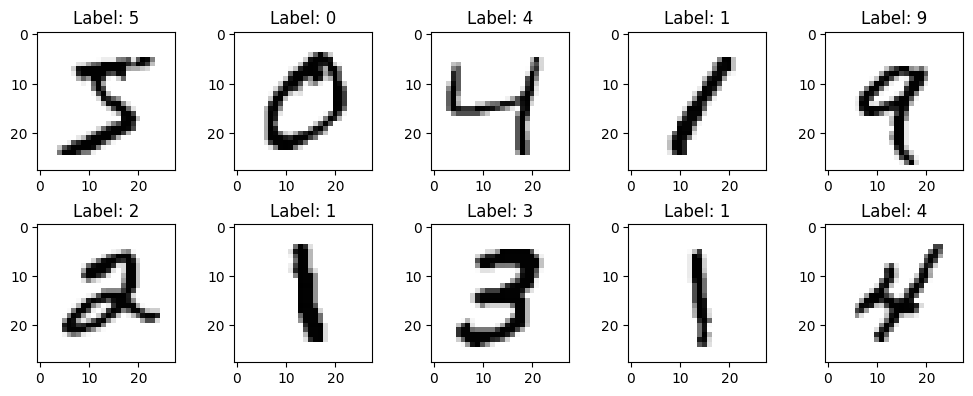

In [25]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Plot the first 10 images in the dataset
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(10, 4))
for i, axi in enumerate(ax.flat):
    axi.imshow(x_train[i], cmap='gray_r')
    axi.set_title(f"Label: {y_train[i]}")
plt.tight_layout()
plt.show()

#**Step 2**: Train - text split and build the model

In [26]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.datasets import mnist
from keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape the data
x_train = np.reshape(x_train, (60000, 28*28))
x_test = np.reshape(x_test, (10000, 28*28))

# Convert labels to one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Define the model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model and store the history
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test loss: {loss:.4f}, Test accuracy: {accuracy:.4f}')


Epoch 1/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2915 - accuracy: 0.9164 - val_loss: 0.1768 - val_accuracy: 0.9487
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1326 - accuracy: 0.9614 - val_loss: 0.1187 - val_accuracy: 0.9638
Epoch 3/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0905 - accuracy: 0.9731 - val_loss: 0.0978 - val_accuracy: 0.9711
Epoch 4/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0651 - accuracy: 0.9806 - val_loss: 0.0895 - val_accuracy: 0.9722
Epoch 5/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0505 - accuracy: 0.9848 - val_loss: 0.0924 - val_accuracy: 0.9731
Epoch 6/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0382 - accuracy: 0.9889 - val_loss: 0.0862 - val_accuracy: 0.9752
Epoch 7/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0307 - accuracy: 0.9902 - val_loss: 0.0919 - val_accuracy:

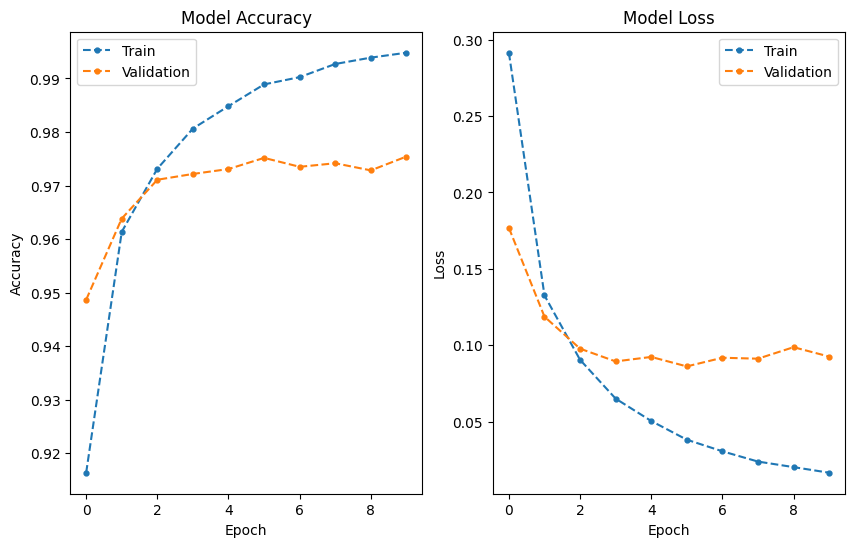

In [53]:
rows = 1  # number of rows in the grid
cols = 2  # number of columns in the grid
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(10, 6))
# Plot the results
axes[0].plot(history.history['accuracy'], marker = '.',  markersize=7, linestyle='--')
axes[0].plot(history.history['val_accuracy'], marker = '.',  markersize=7, linestyle='--')
axes[0].set_title('Model Accuracy')
axes[0].set_ylabel('Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].legend(['Train', 'Validation'], loc='upper left')

axes[1].plot(history.history['loss'], marker = '.',  markersize=7, linestyle='--')
axes[1].plot(history.history['val_loss'], marker = '.',  markersize=7, linestyle='--')
axes[1].set_title('Model Loss')
axes[1].set_ylabel('Loss')
axes[1].set_xlabel('Epoch')
axes[1].legend(['Train', 'Validation'], loc='upper right')
plt.show()

**The steps we made above are explained as follows:**

# 1. Import libraries:
The first line of the code imports the necessary libraries which are numpy, keras, matplotlib, and mnist. 

# 2. Load the MNIST dataset:
The next line loads the MNIST dataset from the Keras datasets module, which includes 60,000 28x28 grayscale images of the 10 digits, along with 10,000 test images.

# 3. Normalize the data:
The pixel values of the images are in the range of 0 to 255, so we normalize the pixel values to be between 0 and 1 by dividing each pixel by 255. We can also use other Normalization methods, like StandardScaler.

# 4. Reshape the data:
The images are flattened to a 1-dimensional array of 784 pixels for each image, so we reshape the data to have a shape of (number of images, 784).

# 5. Convert labels to one-hot encoding:
The labels are in a numerical format from 0 to 9, so we convert them to one-hot encoding using the to_categorical() function. This will transform the labels to binary format, where each label is represented by an array of 10 elements where one element is 1 and the rest are 0.

# 6. Define the model:
We create a sequential model object (our neural network) in Keras and add two dense layers with 128 and 10 nodes respectively. The first dense layer uses the ReLU activation function, and the second dense layer uses the softmax activation function.

# 7. Compile the model:
We compile the model using the Adam optimizer, categorical cross-entropy loss, and accuracy as a metric to monitor during training.
- **Adam optimizer:** Adam (short for Adaptive Moment Estimation) is an optimization algorithm used to update the weights and biases of the model during training. It is a popular optimizer used in deep learning because it is computationally efficient and performs well on a wide range of problems. Adam works by computing adaptive learning rates for each parameter, based on estimates of the first and second moments of the gradients. This helps to speed up convergence and avoid getting stuck in local minima.

- **Categorical cross-entropy loss:** Cross-entropy loss is a common loss function used in classification problems. It measures the dissimilarity between the predicted probabilities and the true probabilities (i.e., one-hot encoded labels) of the classes. Categorical cross-entropy is a specific form of cross-entropy loss used for multi-class classification problems, where each data point can belong to one of several mutually exclusive classes. It is computed by taking the negative log-likelihood of the correct class label, summed over all classes. The goal of the optimizer during training is to minimize this loss function.

- **Accuracy as a metric:** Accuracy is a commonly used evaluation metric for classification problems. It measures the proportion of correctly classified data points over the total number of data points. During training, the optimizer uses the accuracy metric to monitor how well the model is performing on the training and validation data. The goal is to maximize the accuracy, since this indicates that the model is making the correct predictions more often than not.

# 8. Train the model:
We train the model on the training data with a batch size of 32 and for 10 epochs. We also specify a validation split of 0.2, which means 20% of the training data will be used for validation during training. The training process is stored in the history variable.

# 9. Evaluate the model:
We evaluate the model on the test data using the evaluate() function, which returns the loss and accuracy of the model on the test data.

# 10. Plot the results:
Finally, we plot the training and validation accuracy and loss from the history variable using the matplotlib library. We plot the accuracy and loss in a single plot using sublots. The plot shows how the accuracy and loss change with each epoch during training and validation.

*********

#**Step 3**: Try out the model

**Let's try out the capabilities of the network**

1/1 [==============================] - 0s 34ms/step


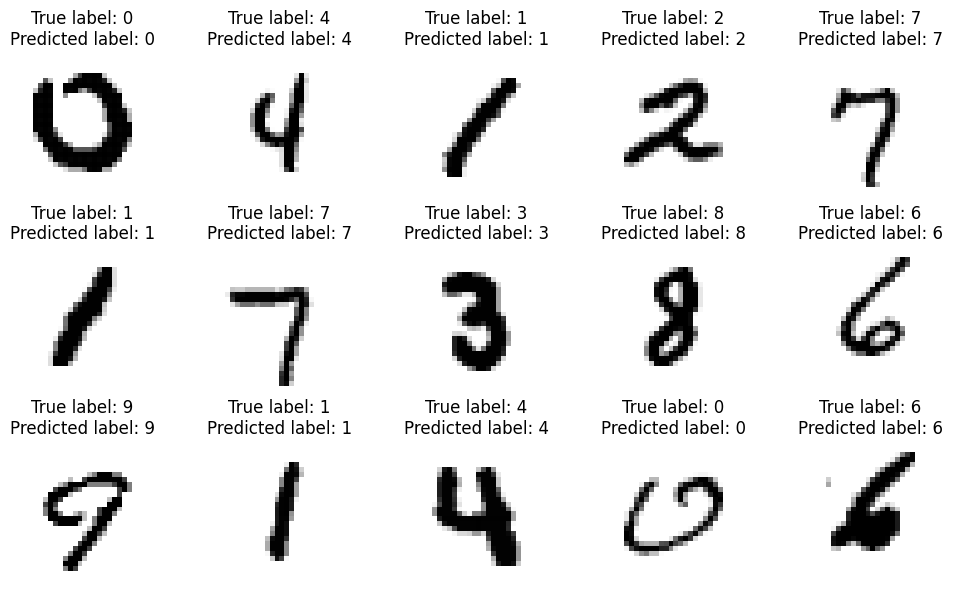

In [15]:
import numpy as np
from keras.models import load_model
from keras.datasets import mnist

# Load the trained model
mod = model

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()


n_rows = 3  # number of rows in the grid
n_cols = 5  # number of columns in the grid
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(10, 6))

for i, ax in enumerate(axes.flat):
    # Select a random image from the test set
    idx = np.random.randint(x_test.shape[0])
    img = x_test[idx]

    # Preprocess the image and make a prediction
    img = img.reshape(1, 784)  # reshape to a 2D tensor
    img = img.astype('float32') / 255.0  # normalize the pixel values
    y_pred = mod.predict(img)
    label = np.argmax(y_pred)

    # Plot the image and predicted label
    ax.imshow(x_test[idx], cmap='gray_r')
    ax.set_title(f"True label: {y_test[idx]}\nPredicted label: {label}")
    ax.axis('off')

plt.tight_layout()
plt.show()


**1. Test the model:**  
In the above code we select 15 random images containing handwritten digits and we predict them, so we can see if the network performs well.   
**2. Plot the results:**  
Finally results showing actual labels vs predicted labels are plotted.

#**Step 4**: Save our model
We save the trained model in h5 format to preserve weights and optimizer state.

In [54]:
model.save('my_beautiful_neural_network.h5')

The next time we will need the model we will simply call: *`keras.models.load_model('my_beautiful_neural_network.h5')`*